<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/IKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Анализ датасета оружия: от разведочного анализа до машинного обучения
Автор: Шарапова Валерия ИТ-5,6

Описание проекта: Полный цикл анализа данных игрового оружия с построением
прогнозной модели для определения редкости
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Для классификации
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Задание 1.1: Загрузите данные в датафрейм
print("=" * 60)
print("ЗАДАНИЕ 1.1: ЗАГРУЗКА ДАННЫХ")
print("=" * 60)

# Загрузка данных
df = pd.read_csv('Weapons_dataset.csv')
print(f"Данные успешно загружены!")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 10 строк данных:")
print(df.head(10))
print("\nПоследние 5 строк данных:")
print(df.tail(5))
print("\nБазовая информация о датасете:")
print(df.info())

"""
## 1. Описание задачи

### 1.1. Предметная область
Датасет содержит информацию о вымышленном оружии, аналогичном тому, что встречается в RPG-играх или фэнтези-вселенных.
Каждая запись представляет уникальный экземпляр оружия с различными характеристиками, которые определяют его
боевую эффективность, редкость и тактическую ценность.

### 1.2. Источник данных
Данные предоставлены в рамках учебного задания в файле `Weapons_dataset.csv`. Датасет является синтетическим
(искусственно сгенерированным) и предназначен исключительно для учебных целей.

### 1.3. Описание признаков
Датасет содержит 1000 записей (экземпляров оружия) и 8 признаков:

| Признак | Тип данных | Описание |
|---------|------------|----------|
| WeaponID | Числовой (int) | Уникальный идентификатор оружия |
| WeaponType | Категориальный (object) | Класс оружия (Sword, Bow, Rifle и др.) |
| Material | Категориальный (object) | Материал изготовления (Iron, Steel, Titanium и др.) |
| Rarity | Категориальный (object) | Редкость оружия. Имеет порядок: Common < Uncommon < Rare < Epic < Legendary < Divine < Mythical < Ancient |
| AttackPower | Числовой (int) | Базовая сила атаки (условные единицы урона) |
| Durability | Числовой (int) | Прочность оружия (условные единицы) |
| Range | Числовой (int) | Максимальная дальность атаки (условные единицы) |
| Weight | Числовой (float) | Вес оружия (условные единицы) |
"""



ЗАДАНИЕ 1.1: ЗАГРУЗКА ДАННЫХ
Данные успешно загружены!
Размер датасета: 1000 строк, 8 столбцов

Первые 10 строк данных:
   WeaponID        WeaponType    Material     Rarity  AttackPower  Durability  \
0         1              Whip        Iron       Rare           74          16   
1         2              Mace     Plastic       Epic          358          81   
2         3               Bow    Titanium       Rare           75          17   
3         4              Mace        Gold   Mythical          130          21   
4         5               Bow       Steel     Divine          454          10   
5         6  Grenade Launcher     Mythril     Common          217          21   
6         7      Sniper Rifle  Adamantium  Legendary          138          11   
7         8            Dagger        Wood   Uncommon          422          43   
8         9   Rocket Launcher       Steel       Epic          316          49   
9        10       Machine Gun    Obsidian  Legendary          373     

'\n## 1. Описание задачи\n\n### 1.1. Предметная область\nДатасет содержит информацию о вымышленном оружии, аналогичном тому, что встречается в RPG-играх или фэнтези-вселенных. \nКаждая запись представляет уникальный экземпляр оружия с различными характеристиками, которые определяют его \nбоевую эффективность, редкость и тактическую ценность.\n\n### 1.2. Источник данных\nДанные предоставлены в рамках учебного задания в файле `Weapons_dataset.csv`. Датасет является синтетическим \n(искусственно сгенерированным) и предназначен исключительно для учебных целей.\n\n### 1.3. Описание признаков\nДатасет содержит 1000 записей (экземпляров оружия) и 8 признаков:\n\n| Признак | Тип данных | Описание |\n|---------|------------|----------|\n| WeaponID | Числовой (int) | Уникальный идентификатор оружия |\n| WeaponType | Категориальный (object) | Класс оружия (Sword, Bow, Rifle и др.) |\n| Material | Категориальный (object) | Материал изготовления (Iron, Steel, Titanium и др.) |\n| Rarity | Категориа

In [ ]:
# Задание 1.2: Определите количество значений каждого из признаков
print("=" * 60)
print("ЗАДАНИЕ 1.2: ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
print("=" * 60)

# Проверка на пропущенные значения
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Количество пропущенных значений по каждому признаку:")
missing_info = pd.DataFrame({
    'Пропущено значений': missing_values,
    'Процент пропусков (%)': missing_percentage.round(2)
})
print(missing_info)

print("\n" + "=" * 40)
print("РЕШЕНИЕ ОБ ОБРАБОТКЕ ПРОПУСКОВ:")
print("=" * 40)

# Проверяем, есть ли пропуски
if missing_values.sum() == 0:
    print("В данных отсутствуют пропущенные значения. Все строки могут быть использованы для анализа.")
    print("Дополнительная обработка не требуется.")
else:
    print("Обнаружены пропуски. План обработки:")
    print("1. Для числовых признаков (AttackPower, Durability, Range, Weight): заполнить медианой")
    print("   Причина: медиана устойчива к выбросам")
    print("2. Для категориальных признаков (WeaponType, Material, Rarity): заполнить модой (наиболее частым значением)")
    print("3. Если пропусков много в каком-либо столбце (>30%) - рассмотреть удаление столбца")
    print("4. Если пропусков мало (<1%) - можно удалить строки")



ЗАДАНИЕ 1.2: ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
Количество пропущенных значений по каждому признаку:
             Пропущено значений  Процент пропусков (%)
WeaponID                      0                    0.0
WeaponType                    0                    0.0
Material                      0                    0.0
Rarity                        0                    0.0
AttackPower                   0                    0.0
Durability                    0                    0.0
Range                         0                    0.0
Weight                        0                    0.0

РЕШЕНИЕ ОБ ОБРАБОТКЕ ПРОПУСКОВ:
В данных отсутствуют пропущенные значения. Все строки могут быть использованы для анализа.
Дополнительная обработка не требуется.


In [ ]:
# Задание 1.3: Определите тип признаков
print("=" * 60)
print("ЗАДАНИЕ 1.3: ОПРЕДЕЛЕНИЕ ТИПОВ ПРИЗНАКОВ")
print("=" * 60)

# Вывод типов данных
print("Типы данных каждого признака:")
print(df.dtypes)

print("\n" + "-" * 40)
print("АНАЛИЗ ТИПОВ ДАННЫХ:")
print("-" * 40)

# Классификация признаков
numerical_features = []
categorical_features = []

for column in df.columns:
    dtype = str(df[column].dtype)
    if 'int' in dtype or 'float' in dtype:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print(f"Числовые признаки ({len(numerical_features)}): {numerical_features}")
print(f"Категориальные признаки ({len(categorical_features)}): {categorical_features}")

print("\n" + "-" * 40)
print("ПРОВЕРКА КОРРЕКТНОСТИ ТИПОВ:")
print("-" * 40)

# Проверка WeaponID
print(f"WeaponID: содержит {df['WeaponID'].nunique()} уникальных значений из {len(df)} строк")
print(f"Начинается с {df['WeaponID'].min()}, заканчивается {df['WeaponID'].max()}")

# Проверка категориальных признаков
print(f"\nКоличество уникальных значений в категориальных признаках:")
for col in categorical_features:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} уникальных значений")

# Проверка порядка для Rarity
print(f"\nУникальные значения Rarity (в порядке появления):")
print(df['Rarity'].unique())

# Определяем правильный порядок редкости
rarity_order = ['Common', 'Uncommon', 'Rare', 'Epic', 'Legendary', 'Divine', 'Mythical', 'Ancient']
print(f"\nПредполагаемый порядок редкости: {rarity_order}")

print("\n" + "=" * 40)
print("ВЫВОДЫ:")
print("=" * 40)
print("1. Все типы данных определены корректно:")
print("   - WeaponID, AttackPower, Durability, Range - целые числа (int64)")
print("   - Weight - число с плавающей точкой (float64)")
print("   - WeaponType, Material, Rarity - строки (object)")
print("\n2. Rarity имеет естественный порядок (ординальная переменная)")
print("3. WeaponID является уникальным идентификатором, не несет аналитической ценности")
print("4. Для анализа Rarity как порядковой переменной требуется преобразование")


print("Преобразование признака Rarity в категориальный с порядком...")
rarity_order = ['Common', 'Uncommon', 'Rare', 'Epic', 'Legendary', 'Divine', 'Mythical', 'Ancient']
# Преобразуем в категориальный тип с порядком
df['Rarity'] = pd.Categorical(df['Rarity'], categories=rarity_order, ordered=True)

# Проверяем преобразование
print(f"Тип Rarity после преобразования: {df['Rarity'].dtype}")
print(f"\nПорядок редкости подтвержден:")
for i, rarity in enumerate(df['Rarity'].cat.categories):
    print(f"  {i+1}. {rarity}")

# Добавляем числовое представление редкости для удобства
rarity_mapping = {rarity: i+1 for i, rarity in enumerate(rarity_order)}
df['Rarity_Score'] = df['Rarity'].map(rarity_mapping)

print(f"\nЧисловое отображение редкости (Rarity_Score):")
print(rarity_mapping)

ЗАДАНИЕ 1.3: ОПРЕДЕЛЕНИЕ ТИПОВ ПРИЗНАКОВ
Типы данных каждого признака:
WeaponID         int64
WeaponType      object
Material        object
Rarity          object
AttackPower      int64
Durability       int64
Range            int64
Weight         float64
dtype: object

----------------------------------------
АНАЛИЗ ТИПОВ ДАННЫХ:
----------------------------------------
Числовые признаки (5): ['WeaponID', 'AttackPower', 'Durability', 'Range', 'Weight']
Категориальные признаки (3): ['WeaponType', 'Material', 'Rarity']

----------------------------------------
ПРОВЕРКА КОРРЕКТНОСТИ ТИПОВ:
----------------------------------------
WeaponID: содержит 1000 уникальных значений из 1000 строк
Начинается с 1, заканчивается 1000

Количество уникальных значений в категориальных признаках:
  WeaponType: 25 уникальных значений
  Material: 17 уникальных значений
  Rarity: 8 уникальных значений

Уникальные значения Rarity (в порядке появления):
['Rare' 'Epic' 'Mythical' 'Divine' 'Common' 'Legendary' '

In [ ]:
# Задание 1.4: Простая фильтрация данных
print("=" * 60)
print("ЗАДАНИЕ 1.4: ПРОСТАЯ ФИЛЬТРАЦИЯ ДАННЫХ")
print("=" * 60)

print("ВОПРОС 1: Вывести все оружие редкости 'Legendary' с силой атаки больше 400")
print("-" * 60)

# Фильтрация по двум условиям
legendary_high_attack = df[(df['Rarity'] == 'Legendary') & (df['AttackPower'] > 400)]
print(f"Найдено {len(legendary_high_attack)} оружия категории 'Legendary' с AttackPower > 400")
print("\nПервые 10 результатов:")
print(legendary_high_attack[['WeaponID', 'WeaponType', 'Material', 'Rarity', 'AttackPower']].head(10))

# Статистика по найденным записям
print(f"\nСтатистика AttackPower для найденных записей:")
print(f"  Максимальная атака: {legendary_high_attack['AttackPower'].max()}")
print(f"  Минимальная атака: {legendary_high_attack['AttackPower'].min()}")
print(f"  Средняя атака: {legendary_high_attack['AttackPower'].mean():.2f}")

ЗАДАНИЕ 1.4: ПРОСТАЯ ФИЛЬТРАЦИЯ ДАННЫХ
ВОПРОС 1: Вывести все оружие редкости 'Legendary' с силой атаки больше 400
------------------------------------------------------------
Найдено 27 оружия категории 'Legendary' с AttackPower > 400

Первые 10 результатов:
     WeaponID     WeaponType    Material     Rarity  AttackPower
14         15         Scythe    Graphene  Legendary          419
39         40    Machine Gun    Graphene  Legendary          463
142       143          Rifle    Titanium  Legendary          486
166       167           Whip     Mythril  Legendary          445
327       328          Rifle      Bronze  Legendary          412
352       353          Staff  Adamantium  Legendary          480
368       369         Dagger        Wood  Legendary          484
371       372          Spear        Wood  Legendary          487
409       410          Sword       Steel  Legendary          494
417       418  Throwing Star       Steel  Legendary          477

Статистика AttackPower дл

In [ ]:
print("\n" + "=" * 60)
print("ВОПРОС 2: Вывести все мечи (Sword), сделанные из титана (Titanium)")
print("-" * 60)

# Фильтрация по типу оружия и материалу
titanium_swords = df[(df['WeaponType'] == 'Sword') & (df['Material'] == 'Titanium')]
print(f"Найдено {len(titanium_swords)} мечей из титана")
print("\nВсе найденные мечи из титана:")
print(titanium_swords[['WeaponID', 'Rarity', 'AttackPower', 'Durability', 'Range', 'Weight']])

# Статистика по титановым мечам
print(f"\nСтатистика для титановых мечей:")
print(f"  Уникальные редкости: {titanium_swords['Rarity'].unique().tolist()}")
print(f"  Средняя сила атаки: {titanium_swords['AttackPower'].mean():.2f}")
print(f"  Средняя прочность: {titanium_swords['Durability'].mean():.2f}")
print(f"  Средний вес: {titanium_swords['Weight'].mean():.2f}")


ВОПРОС 2: Вывести все мечи (Sword), сделанные из титана (Titanium)
------------------------------------------------------------
Найдено 7 мечей из титана

Все найденные мечи из титана:
     WeaponID    Rarity  AttackPower  Durability  Range  Weight
20         21   Ancient           57         100    119    8.59
44         45  Mythical          435          87    184    0.94
171       172      Rare          325          43     22   17.45
174       175    Common          200          11    218    3.12
372       373   Ancient          195           4     80   30.12
742       743  Uncommon          198          58    262   29.30
761       762      Epic          347          22     29   24.67

Статистика для титановых мечей:
  Уникальные редкости: ['Ancient', 'Mythical', 'Rare', 'Common', 'Uncommon', 'Epic']
  Средняя сила атаки: 251.00
  Средняя прочность: 46.43
  Средний вес: 16.31


In [ ]:
# Задание 1.5: Агрегирующие функции
print("=" * 60)
print("ЗАДАНИЕ 1.5: АГРЕГИРУЮЩИЕ ФУНКЦИИ")
print("=" * 60)

print("ВОПРОС 1: Найти среднюю силу атаки для каждого типа оружия")
print("-" * 60)

# Группировка по типу оружия и расчет только средней атаки
attack_by_type = df.groupby('WeaponType')['AttackPower'].mean()

# Создаем DataFrame с двумя столбцами: тип оружия и средняя атака
attack_by_type_df = attack_by_type.reset_index()
attack_by_type_df.columns = ['Тип оружия', 'Средняя сила атаки']

# Сортировка по средней атаке (по убыванию)
attack_by_type_sorted = attack_by_type_df.sort_values('Средняя сила атаки', ascending=False)

print("Средняя сила атаки по типам оружия:")
print(attack_by_type_sorted.round(2).to_string(index=False))

ЗАДАНИЕ 1.5: АГРЕГИРУЮЩИЕ ФУНКЦИИ
ВОПРОС 1: Найти среднюю силу атаки для каждого типа оружия
------------------------------------------------------------
Средняя сила атаки по типам оружия:
      Тип оружия  Средняя сила атаки
          Hammer              310.73
         Blowgun              303.59
         Shotgun              295.44
          Dagger              287.27
            Mace              283.00
Grenade Launcher              277.90
     Machine Gun              273.75
           Sword              264.38
       Laser Gun              263.10
             Axe              257.47
 Rocket Launcher              256.16
           Sling              255.33
           Rifle              255.19
           Spear              253.59
         Bazooka              252.38
           Flail              245.33
    Sniper Rifle              244.97
          Scythe              242.78
           Staff              242.37
   Throwing Star              239.49
          Pistol              236

In [ ]:
print("ВОПРОС 2: Найти общую долговечность для каждого типа оружия")
print("-" * 60)

# Группировка по типу оружия и расчет общей долговечности
durability_by_type = df.groupby('WeaponType')['Durability'].sum()

# Создаем DataFrame с двумя столбцами
durability_by_type_df = durability_by_type.reset_index()
durability_by_type_df.columns = ['Тип оружия', 'Общая долговечность']

# Сортировка по общей долговечности (по убыванию)
durability_by_type_sorted = durability_by_type_df.sort_values('Общая долговечность', ascending=False)

print("Общая долговечность по типам оружия:")
print(durability_by_type_sorted.to_string(index=False))

ВОПРОС 2: Найти общую долговечность для каждого типа оружия
------------------------------------------------------------
Общая долговечность по типам оружия:
      Тип оружия  Общая долговечность
       Laser Gun                 2581
         Shotgun                 2438
          Dagger                 2357
      Plasma Gun                 2289
           Sword                 2284
        Crossbow                 2243
         Blowgun                 2144
Grenade Launcher                 2114
             Bow                 2084
           Staff                 2077
 Rocket Launcher                 2067
          Pistol                 1996
           Sling                 1995
           Flail                 1993
           Rifle                 1920
             Axe                 1876
         Bazooka                 1857
     Machine Gun                 1805
          Scythe                 1783
    Sniper Rifle                 1778
          Hammer                 1759
      

In [ ]:
# Задание 1.6: Поиск объектов с максимальными/минимальными значениями
print("=" * 60)
print("ЗАДАНИЕ 1.6: ПОИСК ОБЪЕКТОВ С ЭКСТРЕМАЛЬНЫМИ ЗНАЧЕНИЯМИ")
print("=" * 60)

print("ВОПРОС 1: Вывести 5 видов оружия с самым большим весом")
print("-" * 60)

# 5 самых тяжелых оружий
top_5_heavy = df.nlargest(5, 'Weight')
print("5 самых тяжелых видов оружия:")
print(top_5_heavy[['WeaponID', 'WeaponType', 'Material', 'Rarity', 'Weight', 'AttackPower', 'Durability']])

# Статистика по топ-5 тяжелым оружиям
print(f"\nСтатистика по 5 самым тяжелым оружиям:")
print(f"  Средний вес: {top_5_heavy['Weight'].mean():.2f}")
print(f"  Диапазон веса: от {top_5_heavy['Weight'].min():.2f} до {top_5_heavy['Weight'].max():.2f}")
print(f"  Самый частый тип оружия: {top_5_heavy['WeaponType'].mode()[0]}")
print(f"  Самый частый материал: {top_5_heavy['Material'].mode()[0]}")



ЗАДАНИЕ 1.6: ПОИСК ОБЪЕКТОВ С ЭКСТРЕМАЛЬНЫМИ ЗНАЧЕНИЯМИ
ВОПРОС 1: Вывести 5 видов оружия с самым большим весом
------------------------------------------------------------
5 самых тяжелых видов оружия:
     WeaponID WeaponType             Material    Rarity  Weight  AttackPower  \
403       404      Spear             Graphene  Uncommon   49.95          168   
888       889      Rifle  Reinforced Concrete    Common   49.82           11   
164       165    Shotgun  Reinforced Concrete  Uncommon   49.73           94   
217       218       Mace  Reinforced Concrete   Ancient   49.66          327   
48         49     Pistol                Steel   Ancient   49.62          461   

     Durability  
403          47  
888          70  
164          68  
217          20  
48           56  

Статистика по 5 самым тяжелым оружиям:
  Средний вес: 49.76
  Диапазон веса: от 49.62 до 49.95
  Самый частый тип оружия: Mace
  Самый частый материал: Reinforced Concrete


In [ ]:
print("\n" + "=" * 60)
print("ВОПРОС 2: Вывести 22% оружия с наименьшей дальностью")
print("-" * 60)

# Рассчитываем 22% от общего количества
twenty_two_percent_count = int(len(df) * 0.22)
print(f"22% от {len(df)} записей = {twenty_two_percent_count} записей")

# 22% оружия с наименьшей дальностью
lowest_22_percent_range = df.nsmallest(twenty_two_percent_count, 'Range')
print(f"\n{twenty_two_percent_count} оружий с наименьшей дальностью:")
print(lowest_22_percent_range[['WeaponID', 'WeaponType', 'Material', 'Rarity', 'Range', 'AttackPower']].head(10))

# Статистика по 22% оружия с наименьшей дальностью
print(f"\nСтатистика для 22% оружия с наименьшей дальностью:")
print(f"  Диапазон дальности: {lowest_22_percent_range['Range'].min()} - {lowest_22_percent_range['Range'].max()}")
print(f"  Средняя дальность: {lowest_22_percent_range['Range'].mean():.2f}")
print(f"  Средняя сила атаки: {lowest_22_percent_range['AttackPower'].mean():.2f}")

# Распределение типов оружия в этом подмножестве
print(f"\nРаспределение типов оружия среди 22% с наименьшей дальностью:")
type_distribution = lowest_22_percent_range['WeaponType'].value_counts()
for weapon_type, count in type_distribution.items():
    percentage = (count / twenty_two_percent_count) * 100
    print(f"  {weapon_type}: {count} шт. ({percentage:.1f}%)")


ВОПРОС 2: Вывести 22% оружия с наименьшей дальностью
------------------------------------------------------------
22% от 1000 записей = 220 записей

220 оружий с наименьшей дальностью:
     WeaponID        WeaponType      Material    Rarity  Range  AttackPower
49         50           Shotgun      Obsidian    Common      1          408
328       329              Whip    Adamantium  Mythical      1          297
474       475             Staff      Titanium   Ancient      1          219
503       504             Spear          Gold   Ancient      1          199
36         37           Shotgun        Bronze    Divine      2          382
775       776   Rocket Launcher     Composite      Epic      2          124
933       934       Machine Gun      Titanium  Mythical      2           77
609       610            Scythe        Bronze  Uncommon      3          272
640       641      Sniper Rifle          Wood  Uncommon      3          126
267       268  Grenade Launcher  Carbon Fiber    Commo

ЗАДАНИЕ 1.7: ВИЗУАЛИЗАЦИЯ КАТЕГОРИАЛЬНОГО ПРИЗНАКА
Выбран категориальный признак: Rarity (Редкость оружия)
Построение столбчатой диаграммы распределения оружия по редкости
------------------------------------------------------------
Распределение оружия по редкости:
 Редкость  Количество  Процент
   Common         129     12.9
 Uncommon         127     12.7
     Rare         127     12.7
     Epic         113     11.3
Legendary         133     13.3
   Divine         124     12.4
 Mythical         119     11.9
  Ancient         128     12.8


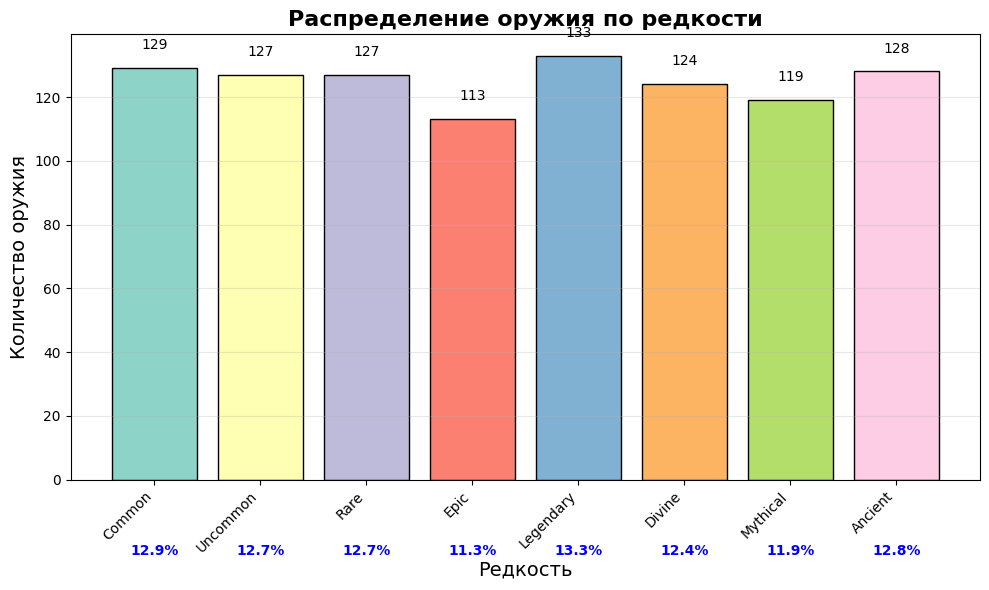

In [ ]:
# Задание 1.7: Столбчатая диаграмма для категориального признака
print("=" * 60)
print("ЗАДАНИЕ 1.7: ВИЗУАЛИЗАЦИЯ КАТЕГОРИАЛЬНОГО ПРИЗНАКА")
print("=" * 60)

print("Выбран категориальный признак: Rarity (Редкость оружия)")
print("Построение столбчатой диаграммы распределения оружия по редкости")
print("-" * 60)

# Подготовка данных
rarity_counts = df['Rarity'].value_counts().sort_index()
rarity_counts_df = pd.DataFrame({
    'Редкость': rarity_counts.index,
    'Количество': rarity_counts.values,
    'Процент': (rarity_counts.values / len(df) * 100).round(1)
})

print("Распределение оружия по редкости:")
print(rarity_counts_df.to_string(index=False))

# Создание столбчатой диаграммы
fig, ax1 = plt.subplots(figsize=(10, 6))

# График: Столбчатая диаграмма
colors = plt.cm.Set3(np.arange(len(rarity_counts)))
bars1 = ax1.bar(range(len(rarity_counts)), rarity_counts.values, color=colors, edgecolor='black')
ax1.set_title('Распределение оружия по редкости', fontsize=16, fontweight='bold')
ax1.set_xlabel('Редкость', fontsize=14)
ax1.set_ylabel('Количество оружия', fontsize=14)
ax1.set_xticks(range(len(rarity_counts)))
ax1.set_xticklabels(rarity_counts.index, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Добавление процентных значений под названиями категорий
for i, (idx, row) in enumerate(rarity_counts_df.iterrows()):
    ax1.text(i, -20, f'{row["Процент"]}%',
             ha='center', va='top', fontsize=10, color='blue', fontweight='bold')

plt.tight_layout()
plt.show()

ЗАДАНИЕ 1.8: КРУГОВАЯ ДИАГРАММА ДЛЯ КАТЕГОРИАЛЬНОГО ПРИЗНАКА
Выбран категориальный признак: Material (Материал изготовления)
Построение круговой диаграммы топ-10 материалов
------------------------------------------------------------
Всего уникальных материалов: 17

Топ-10 материалов по количеству оружия:
 1. Titanium                  -  74 шт. (7.4%)
 2. Composite                 -  68 шт. (6.8%)
 3. Bronze                    -  67 шт. (6.7%)
 4. Graphene                  -  65 шт. (6.5%)
 5. Plastic                   -  65 шт. (6.5%)
 6. Obsidian                  -  64 шт. (6.4%)
 7. Silver                    -  63 шт. (6.3%)
 8. Gold                      -  62 шт. (6.2%)
 9. Diamond                   -  58 шт. (5.8%)
10. Steel                     -  56 шт. (5.6%)

Остальные материалы (7 шт.) - 358 шт. (35.8%)


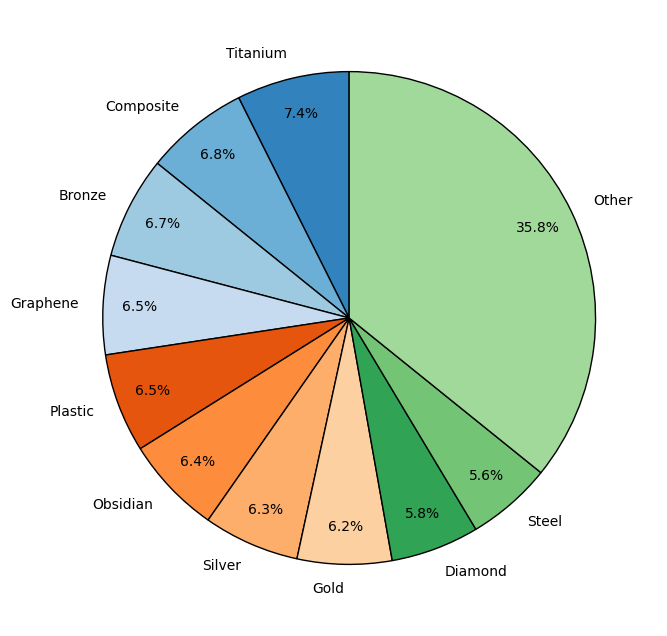

In [ ]:
# Задание 1.8: Круговая диаграмма для другого категориального признака
print("=" * 60)
print("ЗАДАНИЕ 1.8: КРУГОВАЯ ДИАГРАММА ДЛЯ КАТЕГОРИАЛЬНОГО ПРИЗНАКА")
print("=" * 60)

print("Выбран категориальный признак: Material (Материал изготовления)")
print("Построение круговой диаграммы топ-10 материалов")
print("-" * 60)

# Получаем топ-10 материалов по количеству
material_counts = df['Material'].value_counts()
top_materials = material_counts.head(10)
other_count = material_counts[10:].sum() if len(material_counts) > 10 else 0

# Создаем данные для диаграммы
if other_count > 0:
    plot_data = pd.concat([top_materials, pd.Series({'Other': other_count})])
else:
    plot_data = top_materials

print(f"Всего уникальных материалов: {len(material_counts)}")
print(f"\nТоп-10 материалов по количеству оружия:")
for i, (material, count) in enumerate(top_materials.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2}. {material:25} - {count:3} шт. ({percentage:.1f}%)")

if other_count > 0:
    print(f"\nОстальные материалы ({len(material_counts)-10} шт.) - {other_count} шт. ({other_count/len(df)*100:.1f}%)")

# Создание круговой диаграммы - ТОЛЬКО ОДИН ГРАФИК
fig, ax = plt.subplots(figsize=(12, 8))

# Круговая диаграмма
colors = plt.cm.tab20c(np.arange(len(plot_data)))
wedges, texts, autotexts = ax.pie(plot_data.values, labels=plot_data.index,
                                   colors=colors, autopct='%1.1f%%',
                                   startangle=90, pctdistance=0.85,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1})

In [ ]:
# Задание 1.9: Группировка данных
print("=" * 60)
print("ЗАДАНИЕ 1.9: ГРУППИРОВКА ДАННЫХ")
print("=" * 60)

# Группировка по WeaponType
grouped = df.groupby('WeaponType').agg({
    'AttackPower': ['max', 'mean'],
    'Durability': ['max', 'mean']
})

print("Агрегированная информация по типам оружия:")
print("Максимальная и средняя атака, максимальная и средняя прочность:")
print(grouped.round(2))

ЗАДАНИЕ 1.9: ГРУППИРОВКА ДАННЫХ
Агрегированная информация по типам оружия:
Максимальная и средняя атака, максимальная и средняя прочность:
                 AttackPower         Durability       
                         max    mean        max   mean
WeaponType                                            
Axe                      467  257.47        100  55.18
Bazooka                  500  252.38         99  47.62
Blowgun                  490  303.59         98  48.73
Bow                      454  213.65         97  52.10
Crossbow                 485  228.90        100  53.40
Dagger                   484  287.27         98  53.57
Flail                    461  245.33         93  51.10
Grenade Launcher         494  277.90        100  54.21
Hammer                   493  310.73         96  47.54
Laser Gun                484  263.10        100  53.77
Mace                     500  283.00         99  50.12
Machine Gun              492  273.75         95  45.12
Pistol                   493  236.25

In [ ]:
# Задание 2.10: Создание нового признака
print("=" * 60)
print("ЗАДАНИЕ 2.10: СОЗДАНИЕ НОВОГО ПРИЗНАКА")
print("=" * 60)

# Создаем признак "Эффективность" (атака на единицу веса)
df['Effectiveness'] = df['AttackPower'] / df['Weight']
df['Effectiveness'] = df['Effectiveness'].round(2)

print("Добавлен новый признак 'Effectiveness' = AttackPower / Weight")
print(f"Диапазон значений: от {df['Effectiveness'].min():.2f} до {df['Effectiveness'].max():.2f}")
print("\nПервые 5 строк с новым признаком:")
print(df[['WeaponType', 'AttackPower', 'Weight', 'Effectiveness']].head())

ЗАДАНИЕ 2.10: СОЗДАНИЕ НОВОГО ПРИЗНАКА
Добавлен новый признак 'Effectiveness' = AttackPower / Weight
Диапазон значений: от 0.22 до 698.46

Первые 5 строк с новым признаком:
  WeaponType  AttackPower  Weight  Effectiveness
0       Whip           74   19.50           3.79
1       Mace          358   28.02          12.78
2        Bow           75   13.95           5.38
3       Mace          130   30.39           4.28
4        Bow          454    0.65         698.46


ЗАДАНИЕ 2.11: АНАЛИЗ СВЯЗИ ПРИЗНАКОВ


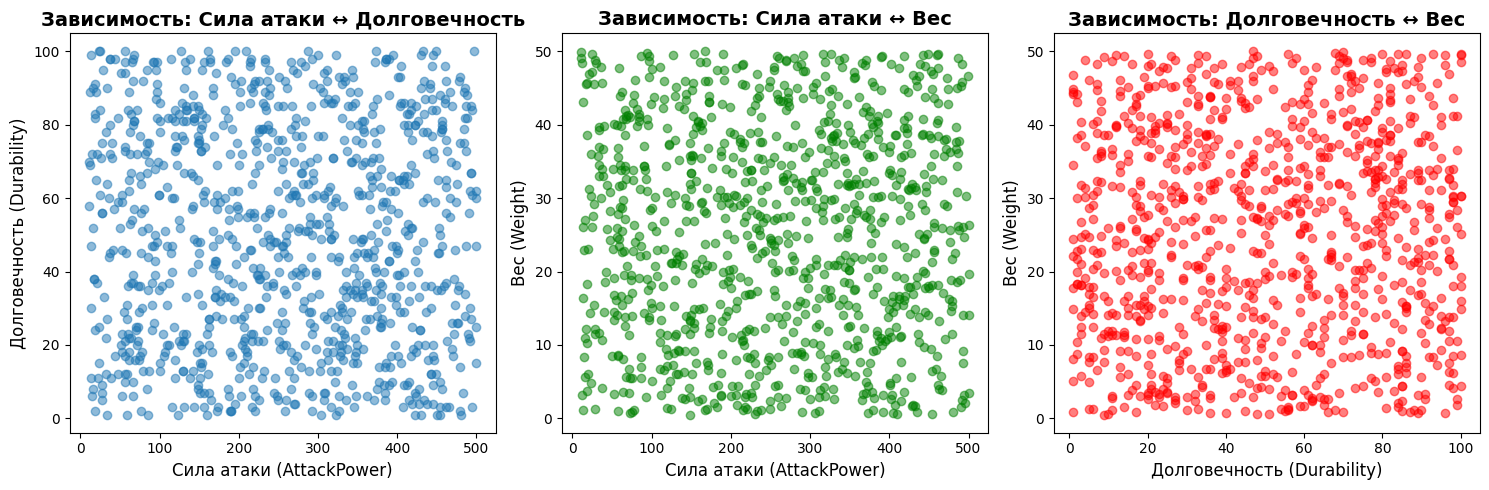


КОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ:
1. AttackPower ↔ Durability: -0.022
2. AttackPower ↔ Weight: 0.011
3. Durability ↔ Weight: 0.034

ВЫВОДЫ И ИНТЕРПРЕТАЦИЯ:

1. СИЛА АТАКИ (AttackPower) и ДОЛГОВЕЧНОСТЬ (Durability):
   Коэффициент корреляции: -0.022
   • Практически нет корреляции
   • Эти характеристики независимы друг от друга

2. СИЛА АТАКИ (AttackPower) и ВЕС (Weight):
   Коэффициент корреляции: 0.011
   • Практически нет корреляции
   • Эти характеристики независимы друг от друга

3. ДОЛГОВЕЧНОСТЬ (Durability) и ВЕС (Weight):
   Коэффициент корреляции: 0.034
   • Практически нет корреляции
   • Эти характеристики независимы друг от друга

ОБЩИЙ ВЫВОД:
• Между всеми тремя парами признаков наблюдается очень слабая корреляция
• Это означает, что сила атаки, долговечность и вес оружия в основном
  определяются независимыми факторами и слабо связаны между собой
• Для создания сбалансированного оружия можно изменять эти характеристики
  независимо друг от друга


In [ ]:
# Задание 2.11: Анализ связи признаков
print("=" * 60)
print("ЗАДАНИЕ 2.11: АНАЛИЗ СВЯЗИ ПРИЗНАКОВ")
print("=" * 60)

# Выбираем 3 числовых признака
features = ['AttackPower', 'Durability', 'Weight']

# Строим матрицу scatter plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. AttackPower vs Durability
axes[0].scatter(df['AttackPower'], df['Durability'], alpha=0.5)
axes[0].set_xlabel('Сила атаки (AttackPower)', fontsize=12)
axes[0].set_ylabel('Долговечность (Durability)', fontsize=12)
axes[0].set_title('Зависимость: Сила атаки ↔ Долговечность', fontsize=14, fontweight='bold')

# 2. AttackPower vs Weight
axes[1].scatter(df['AttackPower'], df['Weight'], alpha=0.5, color='green')
axes[1].set_xlabel('Сила атаки (AttackPower)', fontsize=12)
axes[1].set_ylabel('Вес (Weight)', fontsize=12)
axes[1].set_title('Зависимость: Сила атаки ↔ Вес', fontsize=14, fontweight='bold')

# 3. Durability vs Weight
axes[2].scatter(df['Durability'], df['Weight'], alpha=0.5, color='red')
axes[2].set_xlabel('Долговечность (Durability)', fontsize=12)
axes[2].set_ylabel('Вес (Weight)', fontsize=12)
axes[2].set_title('Зависимость: Долговечность ↔ Вес', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Рассчитываем коэффициенты корреляции для точных выводов
print("\n" + "=" * 60)
print("КОЭФФИЦИЕНТЫ КОРРЕЛЯЦИИ:")
print("=" * 60)

corr_ap_durability = df['AttackPower'].corr(df['Durability'])
corr_ap_weight = df['AttackPower'].corr(df['Weight'])
corr_durability_weight = df['Durability'].corr(df['Weight'])

print(f"1. AttackPower ↔ Durability: {corr_ap_durability:.3f}")
print(f"2. AttackPower ↔ Weight: {corr_ap_weight:.3f}")
print(f"3. Durability ↔ Weight: {corr_durability_weight:.3f}")

print("\n" + "=" * 60)
print("ВЫВОДЫ И ИНТЕРПРЕТАЦИЯ:")
print("=" * 60)

print("\n1. СИЛА АТАКИ (AttackPower) и ДОЛГОВЕЧНОСТЬ (Durability):")
print(f"   Коэффициент корреляции: {corr_ap_durability:.3f}")
if corr_ap_durability > 0.3:
    print("   • Положительная корреляция (чем больше сила атаки, тем выше долговечность)")
    print("   • Слабая зависимость")
elif corr_ap_durability < -0.3:
    print("   • Отрицательная корреляция (чем больше сила атаки, тем ниже долговечность)")
    print("   • Слабая зависимость")
else:
    print("   • Практически нет корреляции")
    print("   • Эти характеристики независимы друг от друга")

print("\n2. СИЛА АТАКИ (AttackPower) и ВЕС (Weight):")
print(f"   Коэффициент корреляции: {corr_ap_weight:.3f}")
if corr_ap_weight > 0.3:
    print("   • Положительная корреляция (чем больше сила атаки, тем больше вес)")
    print("   • Слабая зависимость")
elif corr_ap_weight < -0.3:
    print("   • Отрицательная корреляция (чем больше сила атаки, тем меньше вес)")
    print("   • Слабая зависимость")
else:
    print("   • Практически нет корреляции")
    print("   • Эти характеристики независимы друг от друга")

print("\n3. ДОЛГОВЕЧНОСТЬ (Durability) и ВЕС (Weight):")
print(f"   Коэффициент корреляции: {corr_durability_weight:.3f}")
if corr_durability_weight > 0.3:
    print("   • Положительная корреляция (чем выше долговечность, тем больше вес)")
    print("   • Очень слабая зависимость")
elif corr_durability_weight < -0.3:
    print("   • Отрицательная корреляция (чем выше долговечность, тем меньше вес)")
    print("   • Очень слабая зависимость")
else:
    print("   • Практически нет корреляции")
    print("   • Эти характеристики независимы друг от друга")

print("\n" + "=" * 60)
print("ОБЩИЙ ВЫВОД:")
print("=" * 60)
print("• Между всеми тремя парами признаков наблюдается очень слабая корреляция")
print("• Это означает, что сила атаки, долговечность и вес оружия в основном")
print("  определяются независимыми факторами и слабо связаны между собой")
print("• Для создания сбалансированного оружия можно изменять эти характеристики")
print("  независимо друг от друга")

ЗАДАНИЕ 2.12: BOXPLOT И ОБРАБОТКА ВЫБРОСОВ

------------------------------------------------------------
СТАТИСТИКА ДО ОБРАБОТКИ ВЫБРОСОВ:
------------------------------------------------------------

AttackPower:
  Минимум: 11.00
  1-й квартиль (Q1): 142.00
  Медиана: 259.00
  3-й квартиль (Q3): 374.25
  Максимум: 500.00

Range:
  Минимум: 1.00
  1-й квартиль (Q1): 74.00
  Медиана: 147.00
  3-й квартиль (Q3): 222.00
  Максимум: 300.00

Weight:
  Минимум: 0.53
  1-й квартиль (Q1): 13.22
  Медиана: 25.80
  3-й квартиль (Q3): 37.42
  Максимум: 49.95


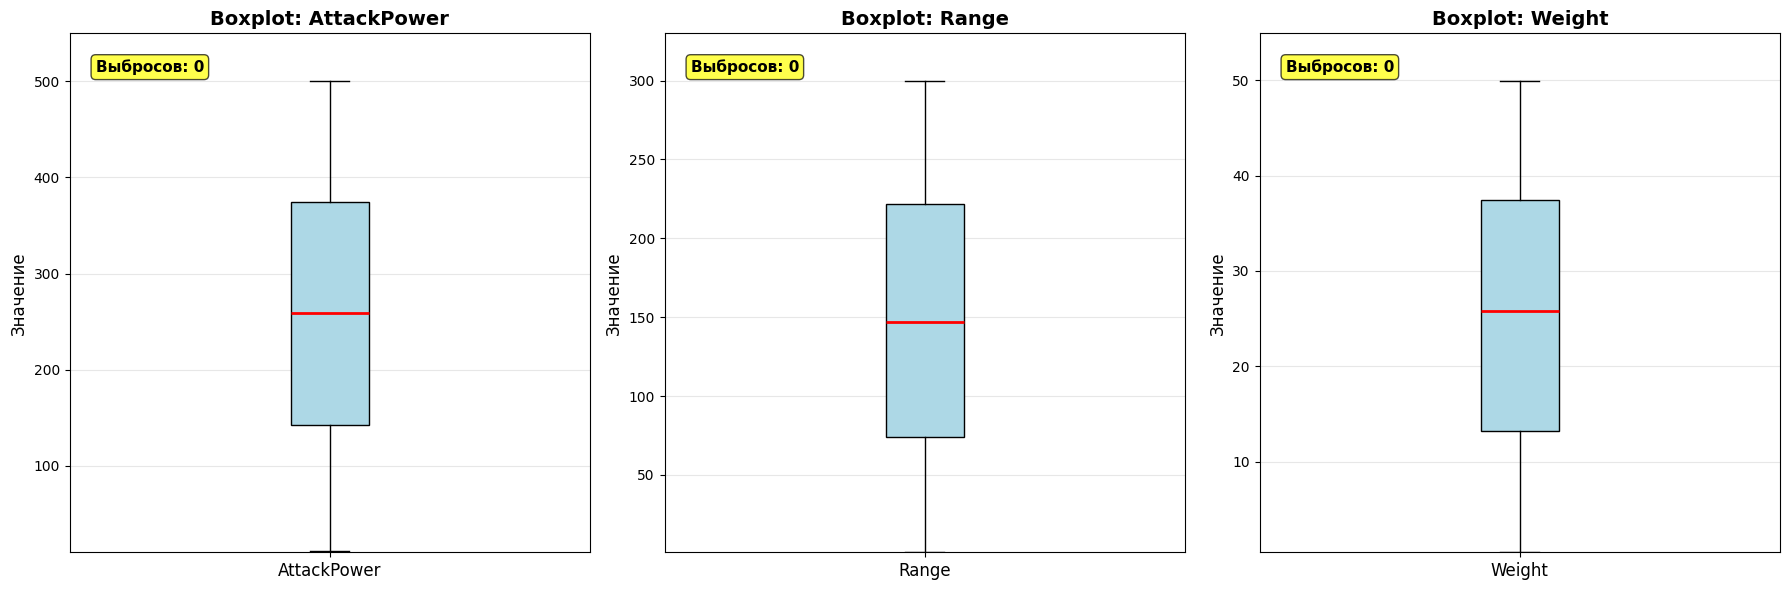


АНАЛИЗ ВЫБРОСОВ ПО ВСЕМ ПРИЗНАКАМ:

AttackPower:
  Границы нормальных значений: [-206.38, 722.62]
  Количество выбросов: 0
  Выбросы не обнаружены

Range:
  Границы нормальных значений: [-148.00, 444.00]
  Количество выбросов: 0
  Выбросы не обнаружены

Weight:
  Границы нормальных значений: [-23.09, 73.73]
  Количество выбросов: 0
  Выбросы не обнаружены

ВЫВОДЫ:
1. Во всех трех признаках (AttackPower, Range, Weight) выбросы не обнаружены
2. Все значения находятся в пределах нормального диапазона
3. Данные хорошо сбалансированы и не требуют обработки выбросов
4. Распределение значений равномерное


In [ ]:
# Задание 2.12: Boxplot и обработка выбросов
print("=" * 60)
print("ЗАДАНИЕ 2.12: BOXPLOT И ОБРАБОТКА ВЫБРОСОВ")
print("=" * 60)

# Выбираем 3 числовых признака
features_box = ['AttackPower', 'Range', 'Weight']

# Анализ статистики до обработки
print("\n" + "-" * 60)
print("СТАТИСТИКА ДО ОБРАБОТКИ ВЫБРОСОВ:")
print("-" * 60)
for feature in features_box:
    print(f"\n{feature}:")
    print(f"  Минимум: {df[feature].min():.2f}")
    print(f"  1-й квартиль (Q1): {df[feature].quantile(0.25):.2f}")
    print(f"  Медиана: {df[feature].median():.2f}")
    print(f"  3-й квартиль (Q3): {df[feature].quantile(0.75):.2f}")
    print(f"  Максимум: {df[feature].max():.2f}")

# Строим boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(features_box):
    # Boxplot
    box = axes[i].boxplot(df[feature], patch_artist=True,
                         boxprops=dict(facecolor='lightblue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='black'),
                         capprops=dict(color='black'),
                         flierprops=dict(marker='o', markersize=5, markerfacecolor='red', alpha=0.5))

    # Настройка графика
    axes[i].set_title(f'Boxplot: {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Значение', fontsize=12)
    axes[i].grid(True, alpha=0.3, axis='y')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature], fontsize=12)

    # Установка числовых меток на оси Y
    min_val = df[feature].min()
    max_val = df[feature].max()
    axes[i].set_ylim(min_val * 0.9, max_val * 1.1)

    # Расчет выбросов
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Подсчет выбросов
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Добавление информации на график
    axes[i].text(0.05, 0.95, f'Выбросов: {len(outliers)}',
                transform=axes[i].transAxes, fontsize=11, fontweight='bold',
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Анализируем, есть ли выбросы в признаках
print("\n" + "=" * 60)
print("АНАЛИЗ ВЫБРОСОВ ПО ВСЕМ ПРИЗНАКАМ:")
print("=" * 60)

for feature in features_box:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"\n{feature}:")
    print(f"  Границы нормальных значений: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Количество выбросов: {len(outliers)}")

    if len(outliers) > 0:
        print(f"  Значения выбросов: {sorted(outliers[feature].unique().tolist())}")
    else:
        print("  Выбросы не обнаружены")

print("\n" + "=" * 60)
print("ВЫВОДЫ:")
print("=" * 60)
if len(outliers) == 0:
    print("1. Во всех трех признаках (AttackPower, Range, Weight) выбросы не обнаружены")
    print("2. Все значения находятся в пределах нормального диапазона")
    print("3. Данные хорошо сбалансированы и не требуют обработки выбросов")
    print("4. Распределение значений равномерное")
else:
    print("Обнаружены выбросы. Требуется дальнейшая обработка.")

In [ ]:
# Задание 13-14: Выбор задачи и формирование признаков
print("=" * 60)
print("ЗАДАНИЕ 13-14: ПОДГОТОВКА К МАШИННОМУ ОБУЧЕНИЮ")
print("=" * 60)

# Выбираем задачу классификации (предсказание редкости)
print("Выбрана задача: Классификация")
print("Целевая переменная: Rarity (предсказание редкости оружия)")

# Формируем факторные признаки и целевую переменную
X = df_clean.drop(['WeaponID', 'Rarity', 'Rarity_Score', 'Effectiveness'], axis=1)
y = df_clean['Rarity_Score']  # Используем числовое представление редкости

print(f"\nФакторные признаки (X): {list(X.columns)}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Целевая переменная (y): Rarity_Score")
print(f"Количество классов: {y.nunique()}")

ЗАДАНИЕ 13-14: ПОДГОТОВКА К МАШИННОМУ ОБУЧЕНИЮ
Выбрана задача: Классификация
Целевая переменная: Rarity (предсказание редкости оружия)

Факторные признаки (X): ['WeaponType', 'Material', 'AttackPower', 'Durability', 'Range', 'Weight']
Количество признаков: 6
Целевая переменная (y): Rarity_Score
Количество классов: 8


In [ ]:
# Задание 15: Кодирование категориальных признаков
print("=" * 60)
print("ЗАДАНИЕ 15: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("=" * 60)

# Определяем категориальные признаки
categorical_cols = ['WeaponType', 'Material']

# OneHotEncoding для категориальных признаков
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Создаем датафрейм с закодированными признаками
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols)

# Объединяем с числовыми признаками
numerical_cols = ['AttackPower', 'Durability', 'Range', 'Weight']
X_final = pd.concat([X_encoded_df, X[numerical_cols].reset_index(drop=True)], axis=1)

print("Категориальные признаки закодированы с помощью OneHotEncoder")
print(f"Размерность признаков до кодирования: {X.shape}")
print(f"Размерность признаков после кодирования: {X_final.shape}")
print(f"Количество созданных бинарных признаков: {len(encoded_cols)}")

print("\n" + "-" * 60)
print("ПЕРВЫЕ 5 СТРОК ПОСЛЕ КОДИРОВАНИЯ:")
print("-" * 60)
print(X_final.head(5))

ЗАДАНИЕ 15: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Категориальные признаки закодированы с помощью OneHotEncoder
Размерность признаков до кодирования: (1000, 6)
Размерность признаков после кодирования: (1000, 44)
Количество созданных бинарных признаков: 40

------------------------------------------------------------
ПЕРВЫЕ 5 СТРОК ПОСЛЕ КОДИРОВАНИЯ:
------------------------------------------------------------
   WeaponType_Bazooka  WeaponType_Blowgun  WeaponType_Bow  \
0                 0.0                 0.0             0.0   
1                 0.0                 0.0             0.0   
2                 0.0                 0.0             1.0   
3                 0.0                 0.0             0.0   
4                 0.0                 0.0             1.0   

   WeaponType_Crossbow  WeaponType_Dagger  WeaponType_Flail  \
0                  0.0                0.0               0.0   
1                  0.0                0.0               0.0   
2                  0.0           

In [ ]:
# Задание 16: Нормализация признаков
print("=" * 60)
print("ЗАДАНИЕ 16: НОРМАЛИЗАЦИЯ ПРИЗНАКОВ")
print("=" * 60)

from sklearn.preprocessing import StandardScaler

# Нормализуем числовые признаки
scaler = StandardScaler()
X_final[numerical_cols] = scaler.fit_transform(X_final[numerical_cols])

print("Числовые признаки нормализованы с помощью StandardScaler")
print("Среднее значение признаков после нормализации:")
print(X_final[numerical_cols].mean().round(2))
print("\nСтандартное отклонение после нормализации:")
print(X_final[numerical_cols].std().round(2))

ЗАДАНИЕ 16: НОРМАЛИЗАЦИЯ ПРИЗНАКОВ
Числовые признаки нормализованы с помощью StandardScaler
Среднее значение признаков после нормализации:
AttackPower   -0.0
Durability     0.0
Range         -0.0
Weight        -0.0
dtype: float64

Стандартное отклонение после нормализации:
AttackPower    1.0
Durability     1.0
Range          1.0
Weight         1.0
dtype: float64
